***1 -  Variable Combinations, Feature Generation, and Interaction Features***

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

regression_data = pd.read_csv('Model/VGChartzGamesSalesDataset.csv')

y_reg = regression_data['total_sales']
X_reg = regression_data.drop(columns=['total_sales'])

for col in X_reg.select_dtypes(include=['object']).columns:
    value_counts = X_reg[col].value_counts()
    rare_categories = value_counts[value_counts < 50].index
    X_reg[col] = X_reg[col].replace(rare_categories, 'Other')
X_reg_encoded = pd.get_dummies(X_reg, drop_first=True)

selector = SelectKBest(score_func=f_regression, k=5)
X_reg_new = selector.fit_transform(X_reg_encoded, y_reg)

selected_features = X_reg_encoded.columns[selector.get_support()]
print("Selected Features (Regression):", selected_features)


Selected Features (Regression): Index(['vgchartz_score', 'critic_score', 'publisher_Activision',
       'publisher_EA Sports', 'publisher_Rockstar Games'],
      dtype='object')


Deep Feature Synthesis (DFS)

In [7]:
import featuretools as ft

X_reg_encoded['index'] = range(len(X_reg_encoded))

es = ft.EntitySet(id="regression_data")
es = es.add_dataframe(dataframe_name="data", dataframe=X_reg_encoded, index="index")

feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="data",
    agg_primitives=["mean", "sum"],
    trans_primitives=["add_numeric", "subtract_numeric"]
)

print("Feature Matrix (DFS):\n", feature_matrix.head())


g:\1-Finlande\Data Analytics\Exercises\.venv\lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
g:\1-Finlande\Data Analytics\Exercises\.venv\lib\site-packages\featuretools\synthesis\dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['mean', 'sum']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


Feature Matrix (DFS):
        vgchartz_score  critic_score  user_score  total_shipped  \
index                                                            
0            7.310415      7.228117    8.086988       5.066328   
1            7.310415      7.228117    8.086988       5.066328   
2            7.310415      7.228117    8.086988       5.066328   
3            7.310415      7.228117    8.086988       5.066328   
4            7.310415      3.500000    8.086988       5.066328   

       publisher_2K Sports  publisher_3DO  publisher_505 Games  publisher_5pb  \
index                                                                           
0                    False          False                False          False   
1                    False          False                False          False   
2                    False          False                False          False   
3                    False          False                False          False   
4                    False  

***2 - Redundancy Management and Dimensionality Reduction***

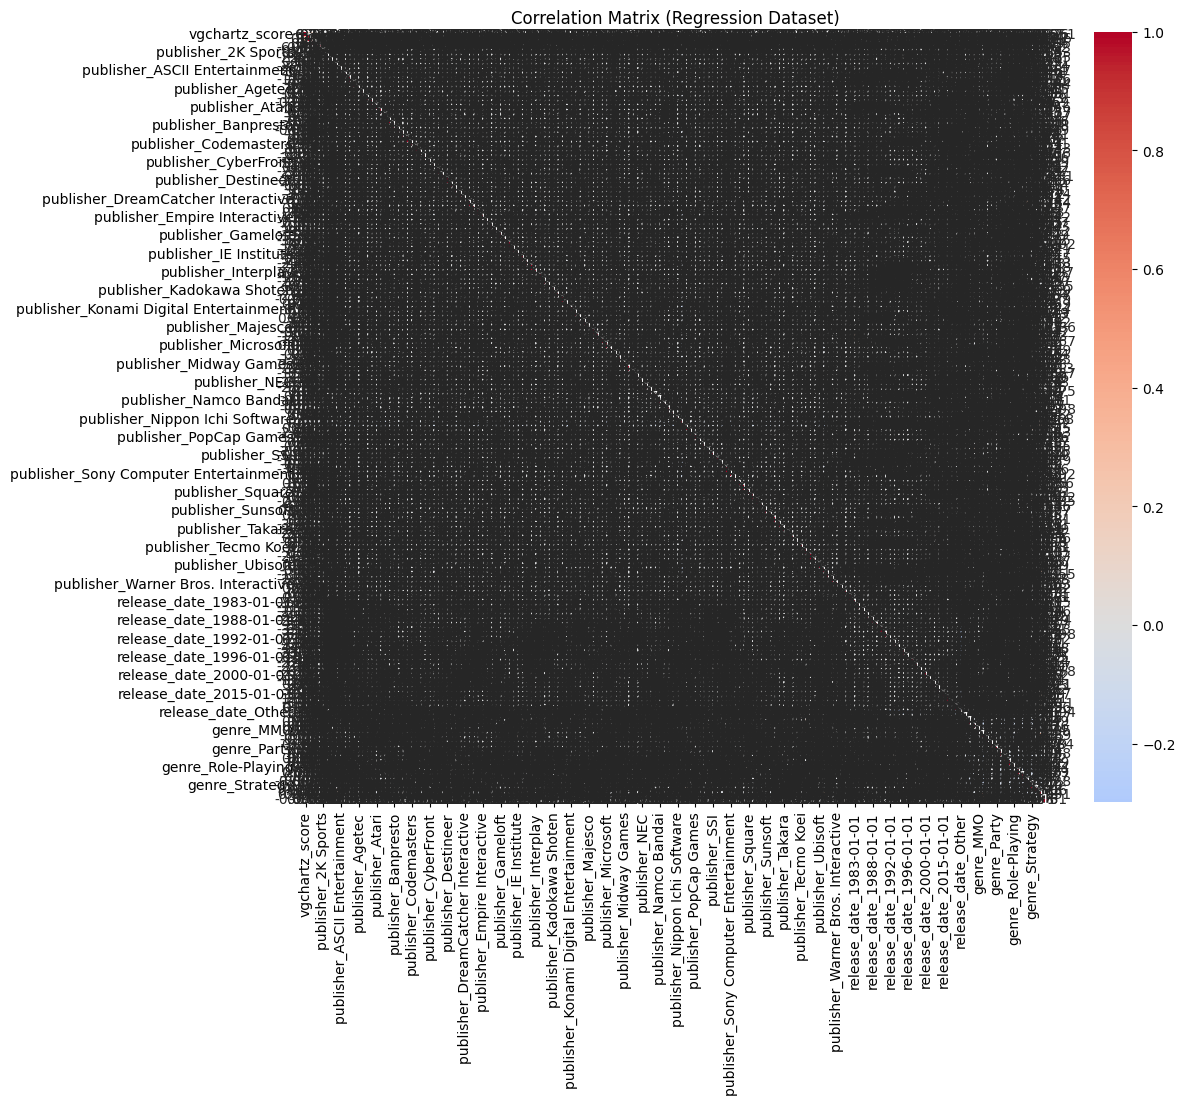

Highly Correlated Features: []


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_reg_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Regression Dataset)')
plt.show()

threshold = 0.9
high_corr_pairs = [
    (col, idx) for col in correlation_matrix.columns for idx in correlation_matrix.index
    if col != idx and abs(correlation_matrix.loc[idx, col]) > threshold
]
print("Highly Correlated Features:", high_corr_pairs)


Dimensionality Reduction with PCA

Explained Variance Ratio: [0.01241204 0.01088895 0.00877894 0.00845246 0.00809805 0.00796421
 0.00789917 0.00769289 0.00759534 0.00747559 0.00737357 0.00732112
 0.0072815  0.00722868 0.00705896 0.00701867 0.00692946 0.00690471
 0.00674015 0.00667396 0.00661043 0.00658126 0.00653429 0.00650928
 0.00644758 0.00641818 0.00640119 0.00639824 0.00633917 0.00631319
 0.00629376 0.00627277 0.00625482 0.0062425  0.00621476 0.00620272
 0.00619955 0.00617799 0.00616715 0.00615513 0.00614471 0.00613291
 0.0061212  0.00609811 0.00608737 0.00606699 0.00606368 0.00605859
 0.00604542 0.00602787 0.00602318 0.00602091 0.00601969 0.00601385
 0.00601089 0.00600438 0.00600086 0.00599611 0.00599481 0.0059919
 0.00599028 0.00598684 0.00598444 0.0059825  0.00598029 0.00597862
 0.00597842 0.00597733 0.00597655 0.00597586 0.00597531 0.00597512
 0.00597414 0.00597356 0.00597245 0.00597227 0.00597161 0.0059712
 0.00597066 0.00597016 0.00596982 0.00596941 0.00596904 0.00596871
 0.00596806 0.00596787 0.00596757 0.00

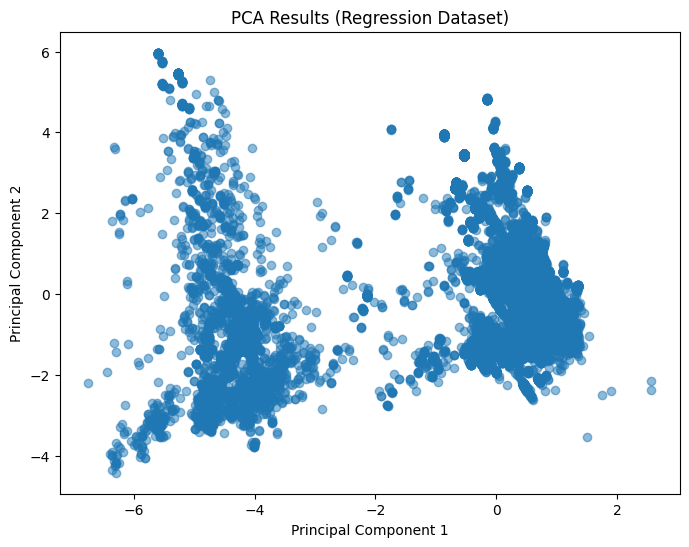

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reg_encoded)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Number of Components Selected:", len(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA Results (Regression Dataset)')
plt.show()
